# Quantum Walks and Monte Carlo Simulation

**Author**: Ayomide Olumide-Attah, Muna Numan Said

**Date**: August 9th, 2025

# Overview

The work in [this paper](https://https://doi.org/10.48550/arxiv.2202.01735) features a rapid quantum algorithm that simulates the classical Galton Board, an interesting object known for its demonstration of core probability ideas, including Gaussian distributions and the Central Limit Theorem, as well as its applications in modeling, machine learning, and system simulations.

This paper aims to demonstrate our team's understanding of the concepts behind the algorithm, as well as propose a method of generalizing it to any number of levels.

# Installation of the necessary dependencies

In [1]:
!pip3 install --upgrade pip

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 17.3 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2


In [2]:
!pip install qiskit==1.3
!pip install qiskit-aer==0.15
!pip install pylatexenc==2.10
!pip install qiskit_ibm_runtime==0.34.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 30.9 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 40.1 MB/s  0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 18.9 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5/5 [qiskit]
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 45.7 MB/s  0:00:00
  Preparing metadata (setup.py) ... done
  DEPRECATION: Building 'pylatexenc' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'pylatexenc'. Discussion can be found at https://github.com/pypa/pip/issues/6334
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=84a1b642998e9da9a6dd15a51f2ce5f6dd9749a305ce3

In [4]:
import qiskit
qiskit.__version__

'1.3.0'

# Import Statements

In [156]:
# Qiskit-related modules
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.visualization import plot_histogram
from qiskit_aer.primitives import SamplerV2

# NumPy for helpful math functionality
import numpy as np

# Part 1: The Quantum Peg

## Quantum Peg

In [174]:
def qpeg(qc: QuantumCircuit, ball: int, path_1: int, path_2: int, control: int):
  q = qc.qregs[0]
  qc.cswap(q[control], q[path_1], q[ball])
  qc.cx(q[ball], q[control])
  qc.cswap(q[control], q[ball], q[path_2])

## Quantum Peg [Demonstration]

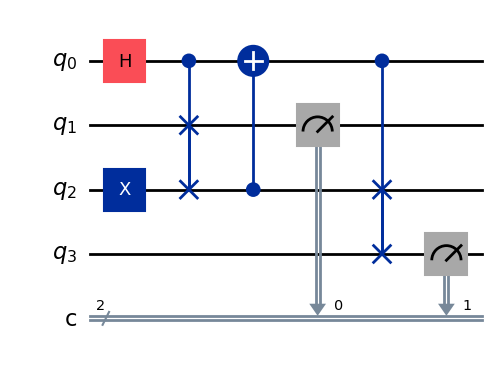

In [171]:
q, c = QuantumRegister(4, 'q'), ClassicalRegister(2, 'c')
qc = QuantumCircuit(q, c)

ball = 2
path_1, path_2 = 1, 3
control = 0

# Placing the 'ball'
qc.x(ball)

# Setting the 'control' qubit in equal superposition (to simulate 'randomness')
qc.h(control)

# Implementing the quantum peg logic
qpeg(qc, ball, path_1, path_2, control)

for i in range(2):
  qc.measure(q[2 * i + 1], c[i])

qc.draw(output="mpl")

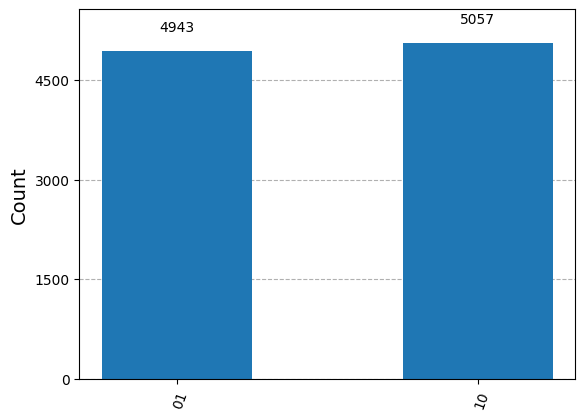

In [172]:
# Results
sampler = SamplerV2()
job = sampler.run([qc], shots=10000)
result = job.result()
counts = result[0].data.c.get_counts()
plot_histogram(counts)

# Part 2: Generalization to an N-level QGB

## N-level Quantum Galton Board

In [180]:
def nth_level_QGB(qc: QuantumCircuit, n: int) -> None:
  q = qc.qregs[0]
  # Placing the 'ball'
  qc.x(q[n + 1])

  # 1st level
  qc.h(q[0])
  qpeg(qc, n + 1, n, n + 2, 0)

  # k-th level (2 <= k <= n)
  for level in range(2, n + 1):
    qc.reset(q[0])
    qc.h(q[0])
    for i in range(1, level + 1):
      start = n + 1 + 2 * i - (level + 1)
      qpeg(qc, start, start - 1, start + 1, 0)
      if i < level:
        qc.cx(q[start + 1], q[0])

# Bonus: Biased QGB (B-QGB) (higher 'p' means more chance of falling to the right)
def nth_level_QGB_biased(qc: QuantumCircuit, n: int, p=0.75) -> None:
  q = qc.qregs[0]
  theta = 2 * np.acos(np.sqrt(p))
  # Placing the 'ball'
  qc.x(q[n + 1])

  # 1st level
  qc.ry(theta, q[0])
  qpeg(qc, n + 1, n, n + 2, 0)

  # k-th level (2 <= k <= n)
  for level in range(2, n + 1):
    qc.reset(q[0])
    qc.ry(theta, q[0])
    for i in range(1, level + 1):
      start = n + 2 * i - level
      qpeg(qc, start, start - 1, start + 1, 0)
      if i < level:
        qc.cx(q[start + 1], q[0])

## N-level Quantum Galton Board [Demonstration]

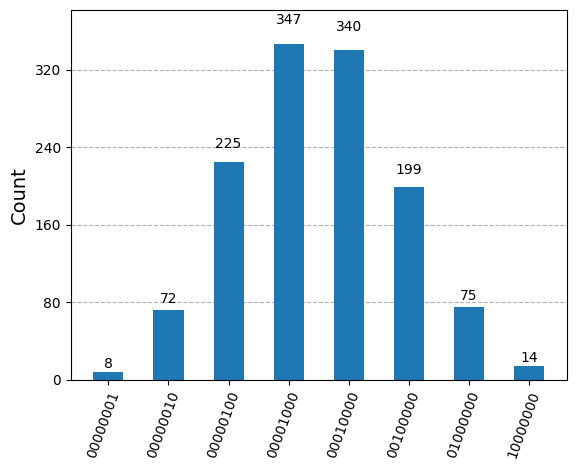

In [175]:
n = 7
q, c = QuantumRegister(2 * n + 2, "q"), ClassicalRegister(n + 1, "c")
qc3 = QuantumCircuit(q, c)

nth_level_QGB(qc3, n)

# Measurement
for i in range(n + 1):
  qc3.measure(q[2 * i + 1], c[i])

# Results
num_shots = (2 ** n) * 10
sampler = SamplerV2()
job = sampler.run([qc3], shots=num_shots)
result = job.result()
counts = result[0].data.c.get_counts()
plot_histogram(counts)


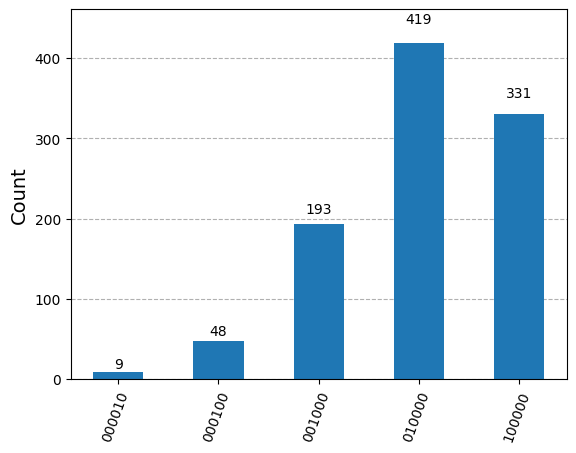

In [179]:
# Bonus: Demonstration of biased QGB
n = 5
q, c = QuantumRegister(2 * n + 2, 'q'), ClassicalRegister(n + 1, 'c')

qc = QuantumCircuit(q, c)
nth_level_QGB_biased(qc, n, p=0.8)
for i in range(n + 1):
  qc.measure(2 * i + 1, i)

# Results
sampler = SamplerV2()
job = sampler.run([qc], shots=1000)
result = job.result()
counts = result[0].data.c.get_counts()
plot_histogram(counts)

# Part 3: Obtaining different distributions from the QGB

## Distribution 1: Exponential

Uses the canonical discretization of the exponential distribution (i.e. the geometric distribution) over a finite set of integers.

In [12]:
def exp_n_level_QGB(qc: QuantumCircuit, n: int, lambd: float) -> None:
  p = 1 - np.exp(-lambd)
  theta = 2 * np.asin(np.sqrt(p))
  # Placing the 'ball'
  qc.x(n + 1)

  # 1st level
  qc.ry(theta, 0)
  qpeg(qc, n + 1, n, n + 2, 0)

  # k-th level (2 <= k <= n)
  for level in range(2, n + 1):
    for i in range(1, level + 1):
      qc.reset(0)
      new_theta = theta if i == level else np.pi
      qc.ry(new_theta, 0)
      start = n + 1 + 2 * i - (level + 1)
      qpeg(qc, start, start - 1, start + 1, 0)
      if i > 1:
        qc.cx(start, start - 1)
        qc.reset(start)

In [ ]:
# Test Exponential QGB
n = 5
q, c = QuantumRegister(2 * n + 2, "q"), ClassicalRegister(n + 1, "c")
qc_exp = QuantumCircuit(q, c)

exp_n_level_QGB(qc_exp, n, lambd=0.8)

# Measurement
for i in range(n + 1):
    qc_exp.measure(2 * i + 1, i)

sampler = SamplerV2()
job = sampler.run([qc_exp], shots=100000)
result = job.result()
counts_exp = result[0].data.c.get_counts()
print("Exponential QGB results:")
print(counts_exp)
plot_histogram(counts_exp)



## 'Distribution' 2: Hadamard quantum walk

In [ ]:
# Modified quantum peg - adds phase for quantum interference
def qpeg_modified(qc: QuantumCircuit, ball: int, path_1: int, path_2: int, control: int):
  q = qc.qregs[0]
  qc.cswap(q[control], q[path_1], q[ball])
  qc.p(np.pi / 16, q[ball])
  qc.cx(q[ball], q[control])
  qc.cswap(q[control], q[ball], q[path_2])

def quantum_walk_QGB(n: int, qc: QuantumCircuit) -> None:
    # Placing the 'ball'
    qc.x(n + 1)

    # 1st level - add phase for quantum walk behavior
    qc.h(0)
    qc.p(np.pi/8, 0)  # phase for interference
    qpeg(qc, n + 1, n, n + 2, 0)

    # k-th level (2 <= k <= n)
    for level in range(2, n + 1):
        qc.reset(0)
        qc.h(0)
        # Different phase for each level to create walk interference
        qc.p(np.pi * level / 8, 0)

        for i in range(1, level + 1):
           start = n + 1 + 2 * i - (level + 1)
           qpeg_modified(qc, start, start - 1, start + 1, 0)
           if i < level:
              qc.cx(start + 1, 0)

In [ ]:
# Test Hadamard quantum walk

n = 5
q, c = QuantumRegister(2 * n + 2, "q"), ClassicalRegister(n + 1, "c")
qc_walk = QuantumCircuit(q, c)

quantum_walk_QGB(n, qc_walk)

for q in range(n + 1):
    qc_walk.measure(2 * q + 1, q)


job = sampler.run([qc_walk], shots=10000)
result = job.result()
counts_walk = result[0].data.c.get_counts()
print("Quantum Walk QGB results:")
print(counts_walk)
plot_histogram(counts_walk)

# Comparing the 3 QGBs (Original, Exponential, Quantum Walk)

**Original**: Uses the Hadamard gate to achieve uniform superposition at every level to obtain a uniform distribution.

**Exponential**: Implements the canonical discretization of the exponential distribution. Results in an exponential decay.

**Quantum Walk**: Uses the Hadamard and Phase gate, as well as distinct phases in qpeg to add interference effects.


 Comparison of all three 5-level variants

Original QGB results:
{'100000': 294, '000100': 3165, '010000': 1591, '000001': 309, '000010': 1545, '001000': 3096}
Position distribution: {1: 309, 2: 1545, 3: 3165, 4: 3096, 5: 1591, 6: 294}

Exponential QGB results:
{'000010': 2473, '000100': 1094, '000001': 5507, '001000': 467, '010000': 253, '100000': 206}
Position distribution: {1: 5507, 2: 2473, 3: 1094, 4: 467, 5: 253, 6: 206}

Quantum Walk QGB results:
{'001000': 3135, '000100': 3076, '000010': 1569, '010000': 1590, '100000': 338, '000001': 292}
Position distribution: {1: 292, 2: 1569, 3: 3076, 4: 3135, 5: 1590, 6: 338}


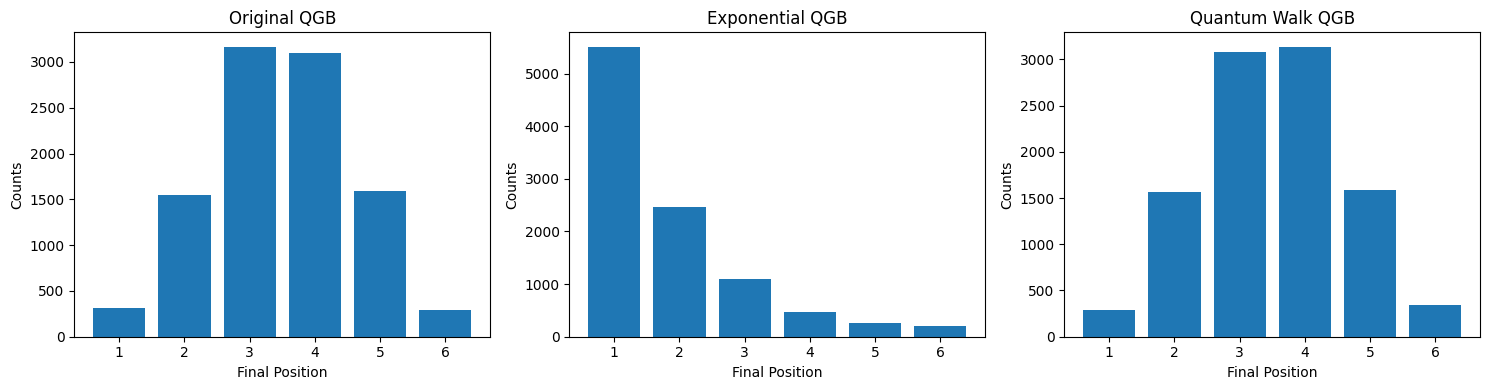

In [145]:
n = 5
circuits = []
names = ["Original", "Exponential", "Quantum Walk"]

for name in names:
    q, c = QuantumRegister(2 * n + 2, "q"), ClassicalRegister(n + 1, "c")
    qc = QuantumCircuit(q, c)

    if name == "Original":
        nth_level_QGB(qc, n)
    elif name == "Exponential":
        exp_n_level_QGB(qc, n, lambd=0.8)
    else:  # Quantum Walk
        quantum_walk_QGB(n, qc)

    # Measurement
    for i in range(n + 1):
        qc.measure(2 * i + 1, i)

    circuits.append(qc)

print(f"\n Comparison of all three {n}-level variants")

job = sampler.run(circuits, shots=10000)
result = job.result()

# Plot all three
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for i, name in enumerate(names):
    counts = result[i].data.c.get_counts()
    print(f"\n{name} QGB results:")
    print(counts)
    positions = {}
    for key, count in counts.items():
        pos = len(key) - key.find("1")
        positions[pos] = count

    print(f"Position distribution: {dict(sorted(positions.items()))}")

    axes[i].bar(positions.keys(), positions.values())
    axes[i].set_title(f'{name} QGB')
    axes[i].set_xlabel('Final Position')
    axes[i].set_ylabel('Counts')

plt.tight_layout()
plt.show()


# REFERENCES

*   Carney, M., & Varcoe, B. (2022). *Universal Statistical Simulator*. https://doi.org/10.48550/arxiv.2202.01735

